In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
current_palette = sns.color_palette("muted")
import matplotlib as mpl
import numpy as np
from pylab import cm
import pandas as pd
import matplotlib.font_manager
import scipy
import os
import glob

plt.style.use('default')
plt.rcParams.update({'figure.figsize':(5.425197, 4.0688),
                     'text.usetex': False,
                     'font.family': 'sans',
                     'font.sans-serif': 'Linux Biolinum',
                     'font.size': 14,
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': 'Linux Biolinum',
                     'mathtext.it': 'Linux Biolinum:italic',
                     'mathtext.bf': 'Linux Biolinum:bold',
                     'lines.linewidth': 2.5,
                     'xtick.labelsize': 18,
                     'ytick.labelsize': 18,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'legend.frameon': True,
                     'legend.fancybox': True,
                     'legend.fontsize': 9,
                     'legend.framealpha': 0,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.borderpad': 0.5,
                     'legend.loc': 'best',
                     'savefig.dpi': 600,
                     'pdf.compression': 9})

In [2]:
# путь для сохранения картинок
save_fig = '/Users/smoluakov/Documents/DIPLOMA/DATA_PROCCESING/CD208/IMAGES/ECH'

In [3]:
path = "/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/generation_small" # для мака
#path = r"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\ELECTROCHEM_DATA\18.02.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V\generation_small" # для винды
list_of_files = os.listdir(path)
list_of_files


['40 min.txt', '.DS_Store', '13 min.txt', '0 min.txt', '27 min.txt']

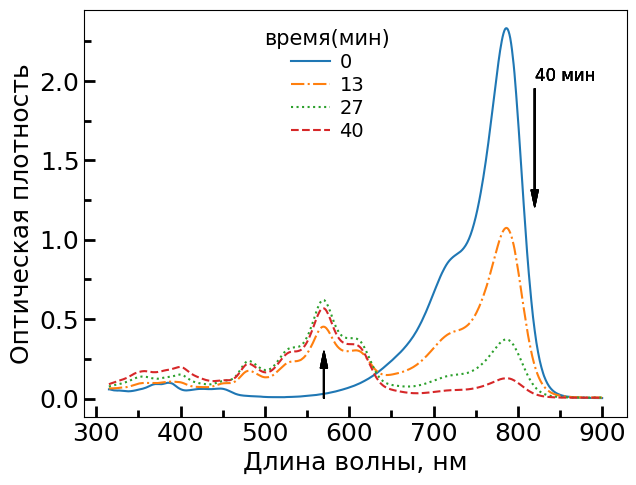

In [56]:

path = "/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/generation_small" # для мака
#path = r"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\ELECTROCHEM_DATA\18.02.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V\generation_small" # для винды
list_of_files = os.listdir(path)

lines=[]
peaks_561 = []
peaks_714 = []
fig = plt.figure()
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))

ax.set_xlabel('Длина волны, нм')
ax.set_ylabel('Оптическая плотность')
#print(list_of_files)


new = []
[new.append(list_of_files[i]) for i in range(len(list_of_files)) if list_of_files[i][0].isdigit()];
new_2 = sorted(new, key=lambda fname: int(fname.split(' ')[0]))
new_3 = [int(fname.split(' ')[0]) for fname in new_2]
for i, file in enumerate(new_2):            

    wavelength, signal = np.loadtxt(os.path.normpath(path)+'/'+file,unpack=True, delimiter=' ', skiprows=0)
    a = np.where(wavelength == 561)
    b = np.where(wavelength == 711)
    peaks_561.append(signal[246])
    peaks_714.append(signal[396])
    lines = ['-','-.', ':', '--']
    ax.plot(wavelength, signal,linestyle=lines[i], linewidth=1.5,label='{}'.format(str(file.split(' ')[0])))
    ax.legend(title="время(мин)",fontsize =14,title_fontsize=15, bbox_to_anchor=(0.6, 1))
    ax.annotate('40 мин', xy=(820, 1.2), xytext=(820, 2.0),
            arrowprops=dict(facecolor='black',width=0.5,headwidth=5,
                            shrink=0.01), fontsize=12)
    ax.annotate('', xy=(570, 0.3), xytext=(570, 0),
            arrowprops=dict(facecolor='black',width=0.5,headwidth=5, shrink=0.01), fontsize=12)
    #ax.text(420,2.0,'(а)',fontsize=25)
    


plt.savefig(save_fig+'/generation_rus.pdf', bbox_inches='tight')
plt.show()


    



**Максимум поглощения исходного красителя - 786нм**

**Максимум поглощения образовавшихся радикалов - 569нм**

In [7]:
first = np.loadtxt("/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/generation_small/0 min.txt")
first[:,1].max()
a = np.where(first[:,1] ==first[:,1].max())
first[a]

array([[786.      ,   2.331217]])

In [8]:
last = np.loadtxt("/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/generation_small/40 min.txt")
last[:,1].max()
np.where(last[:,1] == last[:,1].max())[0][0]
last[np.where(last[:,1] == last[:,1].max())[0][0]]

array([5.69000e+02, 5.68508e-01])

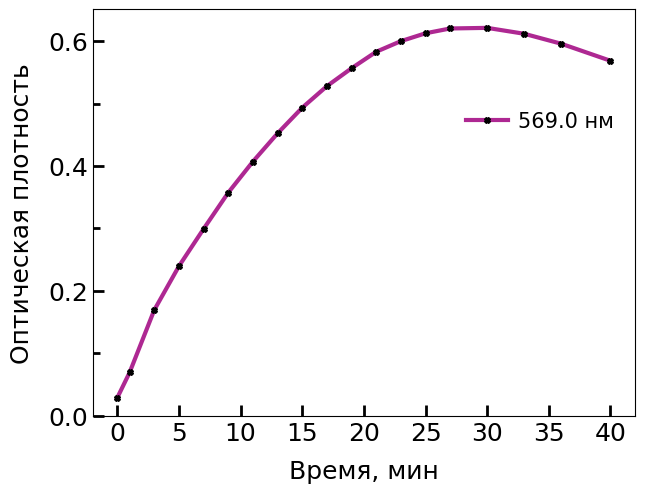

In [58]:
#path = r"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\ELECTROCHEM_DATA\18.02.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V\generation"
path = "/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/generation" # для мака
list_of_files = os.listdir(path)
#list_of_files.remove('76 min.txt')
lines=[]
peaks_561 = []
peaks_714 = []
new = []
[new.append(list_of_files[i]) for i in range(len(list_of_files)) if list_of_files[i][0].isdigit()];
new_2 = sorted(new, key=lambda fname: int(fname.split(' ')[0]))
new_3 = [int(fname.split(' ')[0]) for fname in new_2]
for i, file in enumerate(new_2):            
    wavelength, signal = np.loadtxt(os.path.normpath(path)+'/'+file,unpack=True, delimiter=' ', skiprows=0)
    a = np.where(wavelength == 569)
    b = np.where(wavelength == 786)
    peaks_561.append(signal[254])
    peaks_714.append(signal[471])



fig = plt.figure()
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))

ax.set_xlabel('Время, мин', labelpad=10)
ax.set_ylabel('Оптическая плотность', labelpad=10)

ax.plot(new_3,peaks_561, color=cm.plasma(100), marker='X',markerfacecolor='black',markeredgecolor="black" ,linewidth=3, markeredgewidth=1,
         markersize=4,label='569.0 нм')

#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(prop={'size':15},bbox_to_anchor=(1, 0.8))
plt.savefig(save_fig+'/generation_569.pdf', dpi=300, transparent=False, bbox_inches='tight') 
plt.show()

In [90]:
#path = r"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\ELECTROCHEM_DATA\18.02.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V\relaxation"
path = "/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/relaxation"


list_of_files = os.listdir(path)
list_of_files.remove('1 min.txt')
list_of_files.remove('3 min.txt')
list_of_files.remove('5 min.txt')
list_of_files.remove('7 min.txt')
#list_of_files.remove('9 min.txt')
lines=[]
peaks_rel_561 = []
peaks_rel_714 = []    
relax = []
[relax.append(list_of_files[i]) for i in range(len(list_of_files)) if list_of_files[i][0].isdigit()];
relax_2 = sorted(relax, key=lambda fname: int(fname.split(' ')[0]))
relax_3 = [int(fname.split(' ')[0]) for fname in relax_2]
for i, file in enumerate(relax_2):            

    #wavelength, signal = np.loadtxt(rf"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\ELECTROCHEM_DATA\18.02.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V\relaxation\{file}",unpack=True, delimiter=' ', skiprows=0)
    wavelength, signal = np.loadtxt(f"/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/relaxation/{file}",unpack=True, delimiter=' ', skiprows=0)
    a_rel = np.where(wavelength == 569)
    b_rel = np.where(wavelength == 786)
    peaks_rel_561.append(signal[254])
    peaks_rel_714.append(signal[471])

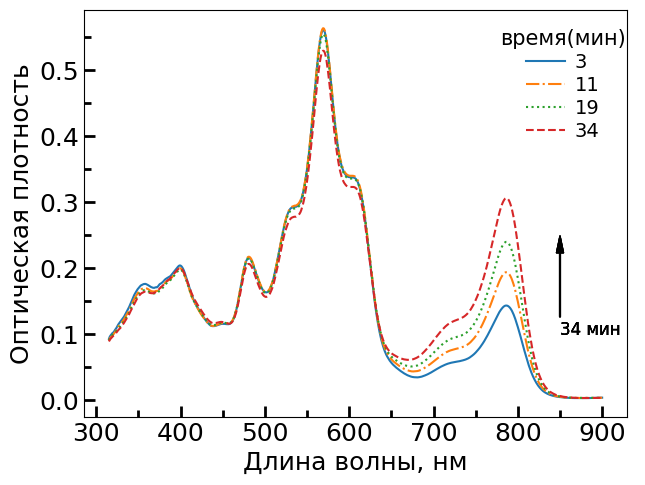

In [60]:
import os
import glob
#path = r"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\ELECTROCHEM_DATA\18.02.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V\relaxation_small"
path = "/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/relaxation_small" # для мака

list_of_files = os.listdir(path)

lines=[]
peaks_561 = []
peaks_714 = []
fig = plt.figure()
ax = plt.gca()
ax = fig.add_axes([0,0,1,1])

ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')


ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0./2))

ax.set_xlabel('Длина волны, нм')
ax.set_ylabel('Оптическая плотность')
#print(list_of_files)


new = []
[new.append(list_of_files[i]) for i in range(len(list_of_files)) if list_of_files[i][0].isdigit()];
new_2 = sorted(new, key=lambda fname: int(fname.split(' ')[0]))
for i, file in enumerate(new_2):            

    #wavelength, signal = np.loadtxt(rf"C:\Users\smolyakov\Documents\GitHub\DIPLOMA\ELECTROCHEM_DATA\18.02.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V\relaxation_small\{file}",unpack=True, delimiter=' ', skiprows=0)
    wavelength, signal = np.loadtxt(f"/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/relaxation_small/{file}",unpack=True, delimiter=' ', skiprows=0)
     
    lines = ['-','-.', ':', '--']
    ax.plot(wavelength, signal,linestyle=lines[i], linewidth=1.5,label='{}'.format(str(file.split(' ')[0])))
    ax.legend(title="время(мин)",fontsize =14,title_fontsize=15, bbox_to_anchor=(0.73, 1))
    #ax.annotate('70 min', xy=(750, 1.2), xytext=(750, 2.0),
    #        arrowprops=dict(facecolor='black',width=0.5,headwidth=5,
    #                        shrink=0.01), fontsize=12)
    ax.annotate('34 мин', xy=(850, 0.25), xytext=(850, 0.1),
            arrowprops=dict(facecolor='black',width=0.5,headwidth=5, shrink=0.01), fontsize=12)
    #ax.text(420,2.0,'(а)',fontsize=25)
    


plt.savefig(save_fig+'/relaxation_rus_color.pdf', bbox_inches='tight')
plt.show()


In [23]:
first = np.loadtxt("/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/relaxation_small/3 min.txt")
first[:,1].max()
b = np.where(first[:,1] ==first[:,1].max())
first[b]

array([[5.69000e+02, 5.60914e-01]])

In [38]:
first = np.loadtxt("/Users/smoluakov/Documents/DIPLOMA/ELECTROCHEM_DATA/27.04.2022 ПК208 ClO4 1e-4 M TBABF4 0,1 M MeCN 1 mm anode 0,4 V/relaxation_small/34 min.txt")
first[300:,1].max()
b = np.where(first[:,1] ==first[300:,1].max())
first[b]

array([[7.8600e+02, 3.0606e-01]])

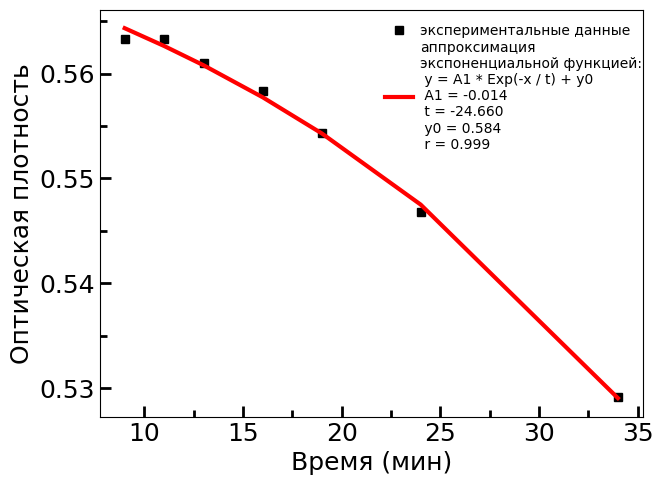

In [110]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

popt, pcov = scipy.optimize.curve_fit(exponenial_func_1, relax_3,peaks_rel_561, maxfev=20000, bounds=(-1000, [10, 1, 10]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_tick_params(which='major', size=8, width=2, direction='in', bottom='on')
ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', bottom='on')
ax.yaxis.set_tick_params(which='major', size=8, width=2, direction='in', left='on')
ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01/2))

ax.set_xlabel('Время (мин)')
ax.set_ylabel('Оптическая плотность')

#ax.plot(relax_3,peaks_rel_561, color='lightcoral', marker='X',markerfacecolor='black',markeredgecolor='black' ,linewidth=3, markeredgewidth=2,
         #markersize=12,label='561 nm')
ax.plot(relax_3,peaks_rel_561,'s',markersize=6,markerfacecolor='black',markeredgecolor='black',label='экспериментальные данные')    
ax.plot(relax_3, exponenial_func_1(relax_3, *popt),linewidth= 3, color='red',
        label='аппроксимация\nэкспоненциальной функцией:\n y = A1 * Exp(-x / t) + y0 \n A1 = %5.3f\n t = %5.3f\n y0 = %5.3f\n r = 0.999' % tuple(popt))    

#ax.text(10,0.25,'(б)',fontsize=25)
#ax.set_title('Кинетика изменения оптической плотности в полосе поглощения дикатион-радикала в процессе анодной поляризации', pad=14, fontsize=20 )
ax.legend(bbox_to_anchor=(0.5, 1),fontsize =10,title_fontsize=12)
#plt.savefig(save_fig+'/expfit_relax_rus.png', transparent=False, bbox_inches='tight') 
plt.show()

In [102]:
def exponenial_func_1(x, a, b, c):
    return a*np.exp(x/(-b))+c

scipy.optimize.curve_fit(exponenial_func_1, relax_3,peaks_rel_561, maxfev=20000, bounds=(-1000, [10, 1, 10]))

(array([-1.39520662e-02, -2.46596115e+01,  5.84437872e-01]),
 array([[ 2.40531057e-05,  2.15284012e-02, -3.01284968e-05],
        [ 2.15284012e-02,  1.93701866e+01, -2.68588721e-02],
        [-3.01284968e-05, -2.68588721e-02,  3.79355276e-05]]))